In [30]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
path = '/home/dev/data_main/DIV2K/processed_50/HR/train/'

initial = os.listdir(path)
len(initial)

605098

In [32]:
#path ='./results/mobilenet_baseline_no_255/ranks/'

path = './results/ranks/'

files = os.listdir(path)

def filter(files, names, epochs, suffix=''):
    out = []
    for n in names:
        for e in epochs:
            for f in files:
                if f'_{n}' in f and f'ep_{e}.' in f:
                    out.append(f)
    return out

def make_dict(files, path,suffix=''):
    out = dict()
    for f in files:
        with open(os.path.join(path, f)) as file:
            lines = file.read()
        numbers = [float(l.split(' ')[1]) for l in lines.split('\n') if len(l)>3]
        names = [l.split(' ')[0] for l in lines.split('\n') if len(l)>3]
        name = f.split('_')[1]
        ep = f.split('_')[3].replace('.txt','')
        #out[f'{name}_ep_{ep}_{suffix}'] = numbers
        out[f'{name}'] = numbers
        out['names'] = names
    return out

In [4]:
# name = 'MSE'
# files_filtered = filter(files, [name, 'SSIM','PSNR'],[1,2,4,6,19])
# data = make_dict(files_filtered, path)
# frame = pd.DataFrame(data)


In [5]:
#frame.corr()

In [49]:
name = 'SSIM'
files_filtered_zero = filter(files, [name],[0])
files_filtered = filter(files, [name],[19])

In [51]:
data_zero = make_dict(files_filtered_zero, path)
data = make_dict(files_filtered, path)

frame_zero = pd.DataFrame(data_zero)
frame = pd.DataFrame(data)

frame_n = frame[f'{name}Counter'] - frame_zero[f'{name}Counter']

SSIM

<AxesSubplot:>

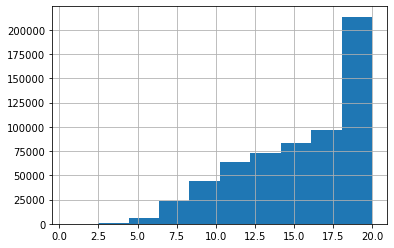

In [52]:
frame[f'{name}Counter'].hist()

PSNR

<AxesSubplot:>

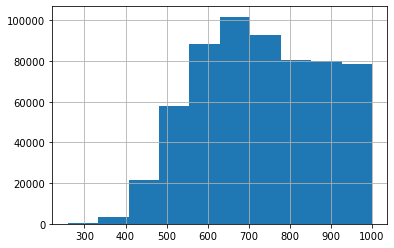

In [48]:
frame[f'{name}Counter'].hist()

MSE

<AxesSubplot:>

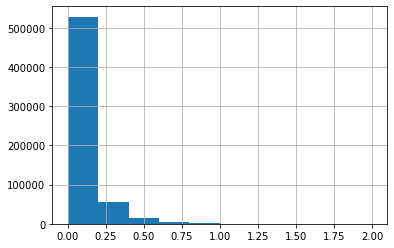

In [35]:
frame[f'{name}Counter'].hist()

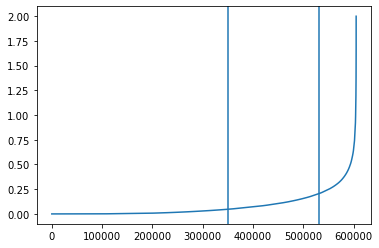

In [37]:
B = 350_000
plt.plot(range(len( frame[f'{name}Counter'].values)), sorted( frame[f'{name}Counter'].values));
plt.axvline(x=B)
plt.axvline(x=B+int(len(frame_n)*0.3))

In [10]:
# mean = frame.mean().values[0]
# std = frame.std().values[0]
# right_bound =  frame.max().values[0]
# right_bound

In [38]:
frame_sorted = frame.sort_values(by=f'{name}Counter')
frame_sorted.head()

,MSECounter,names
393183,0.0,/home/dev/data_main/DIV2K/processed_50/LR/trai...
149703,0.0,/home/dev/data_main/DIV2K/processed_50/LR/trai...
414798,0.0,/home/dev/data_main/DIV2K/processed_50/LR/trai...
266870,0.0,/home/dev/data_main/DIV2K/processed_50/LR/trai...
6454,0.0,/home/dev/data_main/DIV2K/processed_50/LR/trai...


In [12]:
frame_sorted.shape[0]

605098

In [39]:
int(frame_sorted.shape[0]*0.3)

181529

### 30% subset 

In [40]:
B = 350_000
subset_size = int(frame_sorted.shape[0]*0.3)

In [41]:
selected = frame_sorted['names'].to_list()[B: B + subset_size]
len(selected)

181529

In [42]:
#os.makedirs('./subsets/')
folder = './subsets/'
name = 'MSE_3_5e5_linear.txt'

In [43]:
selected = [l.split(' ')[0].split('/')[-1] for l in selected]

In [44]:
selected[0]

'0431_780_1080.png'

In [45]:
with open(os.path.join(folder, name),'w') as f:
    for line in selected:
        f.write(line+'\n')

### SAVE RANDOM SUBSET

In [20]:
folder = './subsets/'
name = 'RANDOM_30.txt'

subset_size = 181529

In [21]:
subset_final = frame_sorted.sample(subset_size)
selected_rand = [s.split('/')[-1] for s in subset_final.names.to_list()]

In [22]:
selected_rand[:4]

['0764_780_0.png',
 '0303_900_660.png',
 '0149_1560_1800.png',
 '0778_600_1080.png']

In [23]:
selected[:4]

['0511_300_780.png',
 '0460_900_1020.png',
 '0631_540_1440.png',
 '0504_840_1920.png']

In [24]:
len(set(selected_rand).intersection(set(selected)))

54703

In [26]:
with open(os.path.join(folder, name),'w') as f:
    for line in selected_rand:
        f.write(line+'\n')

In [27]:
with open('./subsets/RANDOM_30.txt') as f:
    s = f.read()